# Normalization Experiments


In [1]:
# import modules
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, normalize, QuantileTransformer
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
data_directory = "centrifuge_data/"

In [3]:
dfs = []
file_names = []

for filename in os.listdir(data_directory):
    # Check if the file starts with "centrifuge" and ends with ".csv"
    if filename.startswith("centrifuge") and filename.endswith(".csv"):
        name = filename.split('_')[2].split('.')[0] 
        
        df = pd.read_csv(os.path.join(data_directory, filename), sep=',')
        df.fillna(0 , inplace=True)
        
        dfs.append(df)
        file_names.append(name)

In [4]:
# choose the first one as an example
name = file_names[0]
df   = dfs[0]
df = df.set_index(df.columns[0])

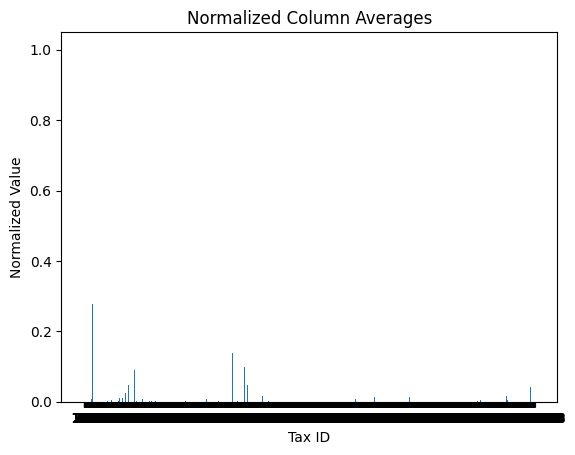

In [5]:
# Calculate the average for each column
column_averages = df.mean()

# Reshape the data to fit the normalize input format
column_averages_reshaped = column_averages.values.reshape(1, -1)

# Use normalize to normalize the averages using the L2 norm
normalized_averages = normalize(column_averages_reshaped, norm='max')

# Convert the result back to a pandas Series
normalized_averages_series = pd.Series(normalized_averages.flatten(), index=column_averages.index)

# Plot the normalized column averages
plt.bar(normalized_averages_series.index, normalized_averages_series)
plt.title('Normalized Column Averages')
plt.xlabel('Tax ID')
plt.ylabel('Normalized Value')
plt.show()

1. z-score based normalization

In [6]:
# Z-score normalization (Standardization)
# may not be good as this is centering on mean (focusing on distributions and we do not want that)
standard_scaler = StandardScaler()
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)


In [7]:
df_standardized.head(15)

,24,162,195,197,199,200,204,210,253,259,...,2594789,2597770,2599293,2599308,2603276,2603292,2603296,2605619,2605620,2609668
0,-0.080322,-0.243269,0.697579,-0.463309,-0.206223,-0.138713,-0.146394,-0.148986,-0.183081,-0.080322,...,-0.409542,-0.198168,-0.080322,-0.142943,-0.202034,-0.080322,-0.225048,-0.080322,-0.176979,-0.080322
1,-0.080322,-0.243269,-0.758506,-0.538263,-0.206223,-0.138713,-0.146394,-0.148986,-0.183081,-0.080322,...,-0.296188,-0.198168,-0.080322,-0.142943,-0.202034,-0.080322,-0.250920,-0.080322,-0.176979,-0.080322
2,-0.080322,-0.243269,-0.303137,-0.482705,-0.206223,-0.138713,-0.146394,-0.148986,-0.183081,-0.080322,...,-0.386134,-0.198168,-0.080322,-0.142943,-0.202034,-0.080322,0.005744,-0.080322,-0.176979,-0.080322
3,-0.080322,-0.243269,0.469780,1.951887,0.139856,-0.138713,-0.146394,-0.148986,-0.183081,-0.080322,...,-0.332068,-0.198168,-0.080322,-0.142943,-0.202034,-0.080322,-0.240636,-0.080322,-0.176979,-0.080322
4,-0.080322,-0.243269,-0.328682,-0.560124,-0.206223,-0.138713,-0.146394,-0.148986,-0.183081,-0.080322,...,1.009374,-0.198168,-0.080322,-0.142943,-0.202034,-0.080322,-0.250920,-0.080322,-0.176979,-0.080322
5,-0.080322,-0.243269,-0.823546,-0.454948,-0.206223,-0.138713,-0.146394,-0.148986,-0.183081,-0.080322,...,-0.439776,-0.198168,-0.080322,-0.142943,-0.202034,-0.080322,-0.250920,-0.080322,-0.176979,-0.080322
6,-0.080322,-0.243269,-0.532185,-0.586565,-0.206223,-0.138713,-0.146394,-0.148986,-0.183081,-0.080322,...,-0.573670,-0.198168,-0.080322,-0.142943,-0.202034,-0.080322,-0.250920,12.449900,-0.176979,-0.080322
7,-0.080322,-0.243269,-0.868781,-0.134531,-0.206223,-0.138713,-0.146394,-0.148986,-0.183081,-0.080322,...,-0.371926,-0.198168,-0.080322,-0.142943,-0.202034,-0.080322,-0.250920,-0.080322,-0.176979,-0.080322
8,-0.080322,-0.182436,-0.853075,-0.633366,-0.206223,-0.138713,-0.146394,-0.148986,-0.183081,-0.080322,...,-0.569295,-0.198168,-0.080322,-0.142943,-0.202034,-0.080322,-0.250920,-0.080322,10.777137,-0.080322
9,-0.080322,-0.243269,1.235989,-0.077229,-0.206223,-0.138713,-0.146394,-0.148986,-0.183081,-0.080322,...,5.070649,-0.198168,-0.080322,-0.142943,-0.202034,-0.080322,-0.250920,-0.080322,-0.176979,-0.080322


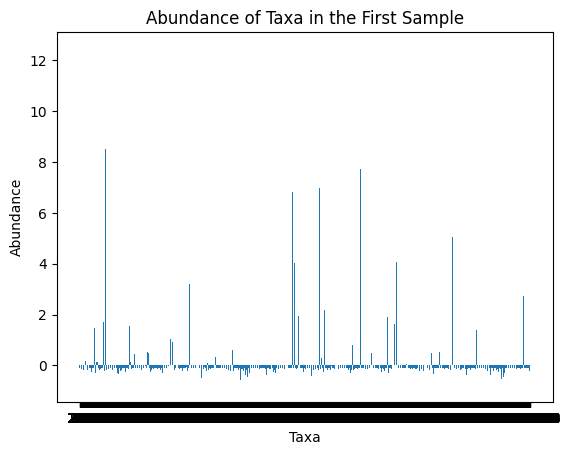

In [8]:
# Example bar plot for the first sample
plt.bar(df_standardized.columns, df_standardized.iloc[0, :])
plt.xlabel('Taxa')
plt.ylabel('Abundance')
plt.title('Abundance of Taxa in the First Sample')
plt.show()

2. MIN-MAX based normalization

In [9]:
# Min-Max Scaling
# simple but still got some small values
min_max_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)

In [10]:
df_minmax.head(15)

,24,162,195,197,199,200,204,210,253,259,...,2594789,2597770,2599293,2599308,2603276,2603292,2603296,2605619,2605620,2609668
0,0.0,0.00000,0.318810,2.585961e-02,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.020898,0.0,0.0,0.0,0.000000e+00,0.0,3.682302e-03,0.0,0.000000e+00,0.0
1,0.0,0.00000,0.022445,1.446181e-02,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.035028,0.0,0.0,0.0,3.251818e-49,0.0,1.041026e-54,0.0,0.000000e+00,0.0
2,0.0,0.00000,0.115129,2.291009e-02,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.023816,0.0,0.0,0.0,0.000000e+00,0.0,3.652967e-02,0.0,0.000000e+00,0.0
3,0.0,0.00000,0.272444,3.931234e-01,0.039232,0.0,0.0,0.0,0.0,0.0,...,0.030555,0.0,0.0,0.0,0.000000e+00,0.0,1.463734e-03,0.0,0.000000e+00,0.0
4,0.0,0.00000,0.109929,1.113756e-02,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.197765,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0
5,0.0,0.00000,0.009207,2.713103e-02,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.017130,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0
6,0.0,0.00000,0.068509,7.116829e-03,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000440,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,1.0,6.195078e-160,0.0
7,0.0,0.00000,0.000000,7.585485e-02,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.025587,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0
8,0.0,0.00617,0.003197,1.975873e-123,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000985,0.0,0.0,0.0,0.000000e+00,0.0,9.773424e-305,0.0,1.000000e+00,0.0
9,0.0,0.00000,0.428395,8.456832e-02,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.703999,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.0


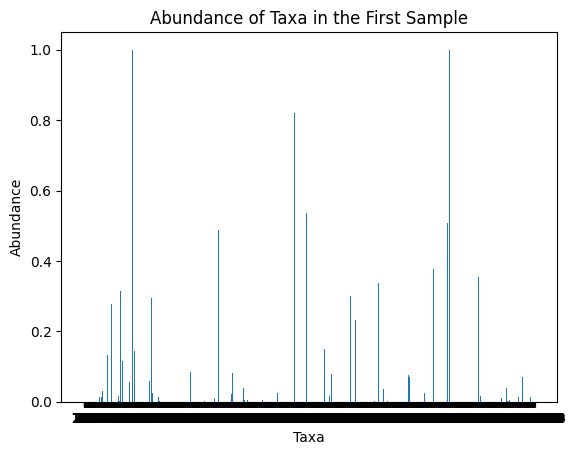

In [11]:
# Example bar plot for the first sample
plt.bar(df_minmax.columns, df_minmax.iloc[0, :])
plt.xlabel('Taxa')
plt.ylabel('Abundance')
plt.title('Abundance of Taxa in the First Sample')
plt.show()

3. Log Transformation

In [12]:
df_log = np.log1p(df)

In [13]:
df_log.head(15)


,24,162,195,197,199,200,204,210,253,259,...,2594789,2597770,2599293,2599308,2603276,2603292,2603296,2605619,2605620,2609668
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ERR688505,0.0,0.000000e+00,0.000533,1.820533e-05,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.000610,0.0,0.000000e+00,0.0,0.000000e+00,0.0,6.970448e-07,0.000000e+00,0.000000e+00,0.0
ERR688506,0.0,0.000000e+00,0.000038,1.018125e-05,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.001022,0.0,0.000000e+00,0.0,1.990870e-55,0.0,1.970620e-58,0.000000e+00,0.000000e+00,0.0
ERR688507,0.0,0.000000e+00,0.000193,1.612887e-05,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.000695,0.0,0.000000e+00,0.0,0.000000e+00,0.0,6.914896e-06,0.000000e+00,0.000000e+00,0.0
ERR688508,0.0,0.000000e+00,0.000456,2.767257e-04,3.842079e-07,0.0,0.0,0.0,0.0,0.0,...,0.000891,0.0,0.000000e+00,0.0,0.000000e+00,0.0,2.770790e-07,0.000000e+00,0.000000e+00,0.0
ERR688509,0.0,0.000000e+00,0.000184,7.840959e-06,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.005754,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
ERR688510,0.0,0.000000e+00,0.000015,1.910042e-05,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.000500,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
ERR688511,0.0,0.000000e+00,0.000115,5.010327e-06,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.000013,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,9.863690e-09,3.607140e-164,0.0
ERR688512,0.0,0.000000e+00,0.000000,5.340137e-05,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.000746,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0
ERR688513,0.0,4.100820e-08,0.000005,1.391040e-126,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.000029,0.0,0.000000e+00,0.0,0.000000e+00,0.0,1.850070e-308,0.000000e+00,5.822420e-05,0.0


In [14]:
df_log.iloc[0, :]

24         0.000000e+00
162        0.000000e+00
195        5.330129e-04
197        1.820533e-05
199        0.000000e+00
               ...     
2603292    0.000000e+00
2603296    6.970448e-07
2605619    0.000000e+00
2605620    0.000000e+00
2609668    0.000000e+00
Name: ERR688505, Length: 2939, dtype: float64

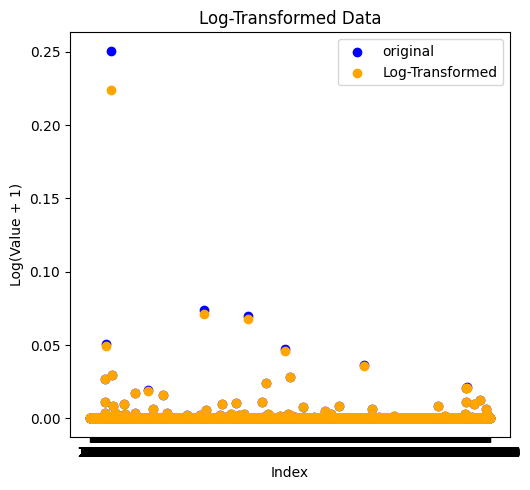

In [15]:
# Plot the original and log-transformed data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.title('Log-Transformed Data')
plt.scatter(df.columns, df.iloc[0, :], color='blue', label='original')
plt.xlabel('Index')
plt.ylabel('value')
plt.legend()


plt.subplot(1, 2, 2)
plt.title('Log-Transformed Data')
plt.scatter(df_log.columns, df_log.iloc[0, :], color='orange', label='Log-Transformed')
plt.xlabel('Index')
plt.ylabel('Log(Value + 1)')
plt.legend()
plt.tight_layout()
plt.show()

4. Power Transformation (Box-Cox and Yeo-Johnson)

In [16]:
# power transformation

# power_trans_boxcox_scaler = PowerTransformer (method="box-cox") - only positive
# power_trans_yeojohnson_scaler = PowerTransformer (method="yeo-johnson") - only positive

# data_power_boxcox_df = power_trans_boxcox_scaler.fit_transform(df)
# data_power_yeojohnson_df = power_trans_yeojohnson_scaler.fit_transform(df)

# not possible as it is targeting only positive value (no 0)

5. Unit Vector Scaling
- L1: When you want the sum of absolute values to be 1 (when having sparse data; many 0)
- L2: When you want to square root of the sum of squared values to be 1 (each features contributes equally)
- Max: When you want the maximum absolute value to be 1 (few dominant features - emphasize impacts) 

In [17]:
vector_scaled_df_l1 = normalize(df, norm="l1")
vector_scaled_df_l1 = pd.DataFrame(vector_scaled_df_l1, columns = df.columns, index = df.index)

vector_scaled_df_l2 = normalize(df, norm="l2")
vector_scaled_df_l2 = pd.DataFrame(vector_scaled_df_l2, columns = df.columns, index = df.index)

vector_scaled_df_max = normalize(df, norm="max")
vector_scaled_df_max = pd.DataFrame(vector_scaled_df_max, columns = df.columns, index = df.index)


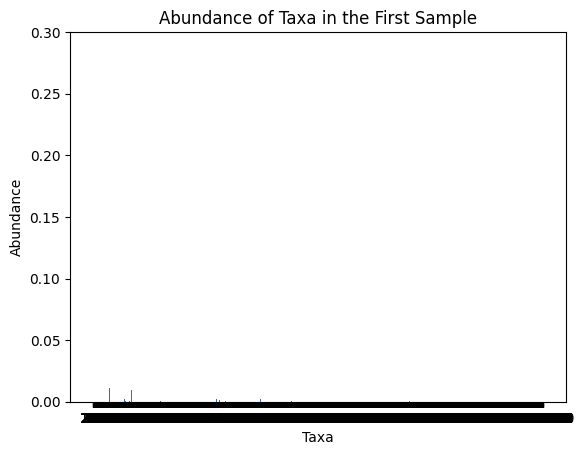

In [18]:
# Example bar plot for the first sample
plt.bar(vector_scaled_df_l1.columns, vector_scaled_df_l1.iloc[0, :])
plt.xlabel('Taxa')
plt.ylabel('Abundance')
plt.title('Abundance of Taxa in the First Sample')
plt.ylim([0,0.3])
plt.show()

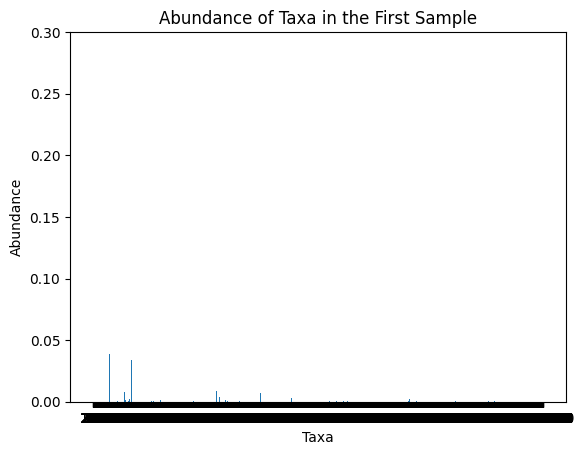

In [19]:
# Example bar plot for the first sample
plt.bar(vector_scaled_df_l2.columns, vector_scaled_df_l2.iloc[0, :])
plt.xlabel('Taxa')
plt.ylabel('Abundance')
plt.title('Abundance of Taxa in the First Sample')
plt.ylim([0,0.3])
plt.show()

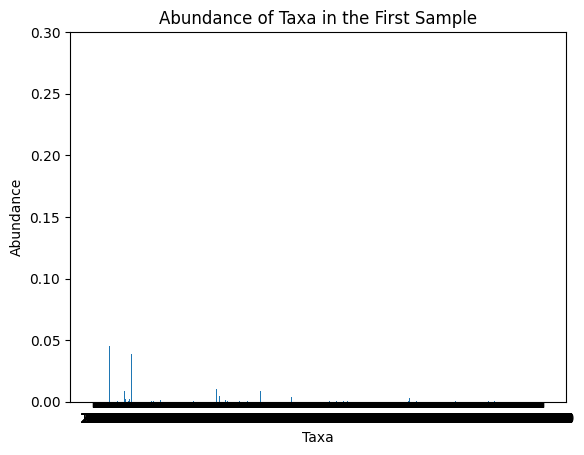

In [20]:
# Example bar plot for the first sample
plt.bar(vector_scaled_df_max.columns, vector_scaled_df_max.iloc[0, :])
plt.xlabel('Taxa')
plt.ylabel('Abundance')
plt.title('Abundance of Taxa in the First Sample')
plt.ylim([0,0.3])
plt.show()

# max can be useful for our case as it extracts features?
